In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Amostragem

In [175]:
# Importação das bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<img src='https://miro.medium.com/max/625/1*ZhYNqU2y96_f3QkWq9oiWQ.jpeg'>

## 1. Introdução

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns **mL** de sangue são retirados para análise.

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.

A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.

![Amostragem](http://drive.google.com/uc?export=view&id=1h3EUKf74tn3WMFJ17KkqnfrHT6MXmm5j)


**ENTÃO POR QUE REALIZAR UMA AMOSTRAGEM?**

Dois principais motivos devem fazer parte da discussão:

- O tamanho da população é bastante considerável. O que torna impossível trabalhar com todos os seus elementos;
- O custo! É um fator determinante, mesmo que a população não seja tão grande, talvez trabalhar com amostragem garanta uma economia de recursos.

In [213]:
# Vamos carregar um dataset de exemplo do Seaborn:

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Qual função do *pandas* pode ser útil para amostrar um conjunto de dados?

- [ ] *value_counts()*
- [ ] *groupby()*
- [X] *sample()*
- [ ] *drop_duplicates()*

In [216]:
# Vamos usar a função sample:

tips.sample()

,total_bill,tip,sex,smoker,day,time,size
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [217]:
# 10 amostras:

tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
163,13.81,2.00,Male,No,Sun,Dinner,2
107,25.21,4.29,Male,Yes,Sat,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
226,10.09,2.00,Female,Yes,Fri,Lunch,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
188,18.15,3.50,Female,Yes,Sun,Dinner,3
91,22.49,3.50,Male,No,Fri,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
65,20.08,3.15,Male,No,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [218]:
# 20 amostras:

tips.sample(20)

,total_bill,tip,sex,smoker,day,time,size
115,17.31,3.50,Female,No,Sun,Dinner,2
187,30.46,2.00,Male,Yes,Sun,Dinner,5
22,15.77,2.23,Female,No,Sat,Dinner,2
232,11.61,3.39,Male,No,Sat,Dinner,2
146,18.64,1.36,Female,No,Thur,Lunch,3
176,17.89,2.00,Male,Yes,Sun,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4
69,15.01,2.09,Male,Yes,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2


Usar amostras é uma vantagem. Porém tem que tomar alguns cuidados = VIÉS

## 1.1.Definições

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da população;

**Amostra**: uma parte ou subconjunto da população;

**Censo**: observação de todos os elementos da população;

**Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opinião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

Todas as informações obtidas através de dados amostrais, ou seja, que não abrangem o todo da população de interesse, são baseadas em estimativas.

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais:
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    - proporção: $p$
    - desvio padrão: $\sigma$
    
- Exemplos de estimadores de ponto:
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$
    - proporção: $\hat{p}$
    - desvio padrão amostral: $\hat{s}$
    

    
### 1.2 Propriedade dos estimadores
 - Não viesado (não tendencioso): $E(\hat{\beta}) = \beta$
 - Eficiente:  dentre os estimadores não-viesados, escolher o de menor variância
 - Consistente: $ lim_{n \to \infty} P(|\hat{\beta}-\beta| > \epsilon) = 0$ (quanto maior a amostra, mais perto a estimativa estará do parâmetro populacional). Em outras "palavras":

 $ lim_{n \to \infty} E(\hat{\beta}) \to \beta$     e     $ lim_{n \to \infty} Var(\hat{\beta}) \to 0$





Demonstração do uso do n-1 no lugar do n, na variância amostral:
https://www.inf.ufsc.br/~andre.zibetti/probabilidade/distribuicao_amostral_variancia.html

Sobre a distribuição da média amostral (necessário para entender a variância da média amostral utilizada acima):
https://www.inf.ufsc.br/~andre.zibetti/probabilidade/distribuicao_amostral_variancia.html

## 2.Tipos  de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados. (aleatória simples, estratificada, sistemática e por conglomerados)


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental. (acidental, intencional, por cotas)

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetivo de obter uma **amostra representativa**.

Uma amostra é considerada representativa quando consegue **refletir as características da população**.

Vamos ver os principais **métodos de amostragem**:    

### 2.1. Amostra Aleatória Simples

<font color='blue'> "Dá a mesma chance a todos os membros de uma população de ser selecionado, além de utilizar alguns mecanismos de causalidade para escolhê-los"</font>


Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com reposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.

Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

<img src="http://khsapstats.weebly.com/uploads/3/8/5/3/3853479/6057546.gif?242" width=400>

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**:

In [219]:
# Import sample da biblioteca random

from random import sample

In [221]:
alunos = list(range(1, 21))

print(f'População: {alunos}\n')
amostra = sample(alunos, 5)
print(f"Amostra: {amostra}")

População: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Amostra: [9, 8, 20, 16, 14]


In [222]:
# Import choice da numpy.random:

from numpy.random import choice

In [223]:
np.random.seed(42) #permitir a reprodutibilidade

choice(alunos, size=5, replace=False)

array([ 1, 18, 16,  2,  9])

In [224]:
choice(alunos, size=5)

array([ 2,  1, 12, 12, 17])

**Exemplo com dataset**

In [225]:
 tips_sample = tips.sample(n=50, replace=False, random_state=42)
 tips_sample##aqui, os índices são os mesmos do dataframe original

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [227]:
# Atualizando os índices:

tips_sample.index = list(range(tips_sample.shape[0]))
tips_sample

,total_bill,tip,sex,smoker,day,time,size
0,19.82,3.18,Male,No,Sat,Dinner,2
1,8.77,2.00,Male,No,Sun,Dinner,2
2,24.55,2.00,Male,No,Sun,Dinner,4
3,25.89,5.16,Male,Yes,Sat,Dinner,4
4,13.00,2.00,Female,Yes,Thur,Lunch,2
5,17.89,2.00,Male,Yes,Sun,Dinner,2
6,28.44,2.56,Male,Yes,Thur,Lunch,2
7,12.48,2.52,Female,No,Thur,Lunch,2
8,14.78,3.23,Male,No,Sun,Dinner,2
9,15.38,3.00,Female,Yes,Fri,Dinner,2


In [229]:
#Comparar a média da amostra com a média da população

print(f"Média populacional = {tips['total_bill'].mean()}")
print(f"Média amostral = {tips_sample['total_bill'].mean()}")

Média populacional = 19.78594262295082
Média amostral = 17.971999999999998


In [231]:
#Comparar a std da amostra com a std da população:

print(f"Desvio padrão populacional = {tips['total_bill'].std()}")
print(f"Desvio padrão amostral = {tips_sample['total_bill'].std()}")

Desvio padrão populacional = 8.902411954856856
Desvio padrão amostral = 9.232929974735395


Podemos analisar a proporção dos indivíduos por gênero, comparando a população e a amostra.

In [233]:
# Proporção população:

tips['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [234]:
# Proporção amostra:

tips_sample['sex'].value_counts(normalize=True)

Male      0.62
Female    0.38
Name: sex, dtype: float64

Ao usar o parâmetro `weights` juntamente com a função *sample* do *pandas* valores maiores terão maior probabilidade de serem sorteados.

In [237]:
 # considerando um peso diferentes para os elementos da minha amostra

 w_sex = np.array(tips['sex'].map({'Female': 2, 'Male': 1}).values)
 weigths = w_sex / sum(w_sex)

 tips_samples_weights = tips.sample(n=50, weights=weigths, random_state=42)

print(tips_sample['sex'].value_counts(normalize=True), '\n')
print(tips_samples_weights['sex'].value_counts(normalize=True))

Male      0.62
Female    0.38
Name: sex, dtype: float64 

Male      0.56
Female    0.44
Name: sex, dtype: float64


No caso acima **NÃO** é uma amostra aleatória simples pois possui pesos no momento da seleção da amostra

### 2.2. Amostra Sistemática

<font color='blue'> "Os elementos são selecionados seguindo uma regra pré definida"</font>

Usada quando os elementos população estão ordenados (população de lista telefônica, casas em uma rua).

Considere uma população de tamanho $N$ e que se queira uma amostra de tamanho $n$. O processo de amostragem deste método consiste em:

- Dividir o tamanho populacional em $K$ partes:
$$ k = \frac{N}{n} $$

- Definir a posição de início da amostragem (que também será o primeiro elemento da amostra). Para tal fim, é sorteado $i$ com o uso da amostra aleatória simples no intervalo, em que  $i \in [1, k]$


- A partir do elemento selecionado aleatoriamente, é realizada sucessão aritimética para selecionar os $n-1$ indivíduos restantes
$$i, i + k, i + 2k, i + 3k, ...., i + (n-1)k$$

<img src="http://faculty.elgin.edu/dkernler/statistics/ch01/images/sys-sample1.gif" width=400>

Exemplo de algoritmo para amostragem sistemática no exemplo de 20 alunos

20 elementos na população  
5 elementos da amostra

passo = 20 / 5 = 4

In [238]:
alunos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [241]:
# Import da função randint:

from random import randint

In [239]:
def amostragem_sistematica(populacao, n):
    N = len(populacao) # total de elementos na população
    k = N // n # k escolha de 4 em 4 pq temos 20 amostras e quero 5 elementos
    initial_index = randint(0, k - 1) # índice inicial

    amostras = []

    for index in range(initial_index, N, k):
      amostras.append(populacao[index])

    return amostras

In [246]:
amostragem_sistematica(alunos, 5)

[3, 7, 11, 15, 19]

**No nosso dataset**

In [249]:
# Array ordenado dos dados da coluna total_bill:

total_bill_sorted = sorted(np.array(tips['total_bill']))

In [250]:
amostragem_sistematica(total_bill_sorted, 10)

[7.25, 10.59, 12.74, 14.48, 16.29, 17.82, 20.08, 22.67, 26.41, 32.4, 50.81]

### 2.3.Amostra Estratificada

<font color='blue'> A população é dividida em estratos homogêneos (grupos com elementos de características comuns) e é selecionada uma amostra aleatória de cada estrato. </font>
    
Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo.

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc.

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas.

Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola).

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.

<img src="https://faculty.elgin.edu/dkernler/statistics/ch01/images/strata-sample.gif" width=400>

In [251]:
tips['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [252]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25 * tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5 * tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25 * tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


### 2.4. Amostra por conglomerados

<font color='blue'> A população (extensa) é dividia em miniaturas da população (não homgêneas) e seleciona-se uma amostra aleatória desses conglomerados </font>

A população é dividida em subpopulações (conglomerados) heterogêneas distintas (quarteirões, residências, famílias, bairros, etc.). Alguns dos conglomerados são selecionados segundo amostra aleatória simples e **todos os elementos** nos conglomerados selecionados são observados. Note que amostragem é feita sobre os conglomerados, e não mais sobre os indivíduos da população. Este procedimento amostral é adequado quando é possível dividir a população em um grande número de pequenas subpopulações.

Geralmente este método é usado quando os sistemas de referência da população não são adequados e o custo para atualização é alto, ou quando identificar os elementos da população em campo é cara e consome muito tempo.

<img src='http://khsapstats.weebly.com/uploads/3/8/5/3/3853479/4206002.gif' width=400>



**Exemplo**: Suponha que o objetivo de uma pesquisa seja determinar a renda média familiar de moradores de uma cidade. Dificilmente dispõe-se de uma lista de famílias, a unidade elementar da população de interesse. Pode-se usar como sistema de referência a lista de setores censitários do IBGE. Neste caso, os setores censitários seriam os conglomerados.

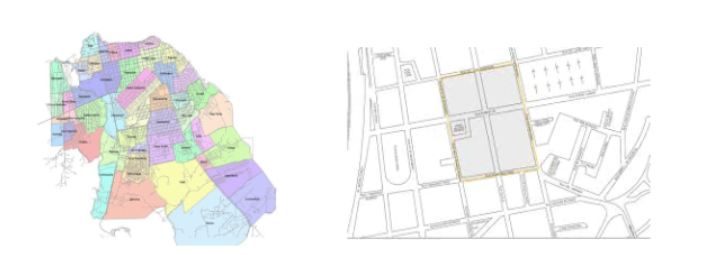

Então sabemos como coletar os dados. Agora vamos ver como analisar/estimar os dados da população de acordo com a amostra. INFERÊNCIA.

Abaixo, uma tabela de estimadores

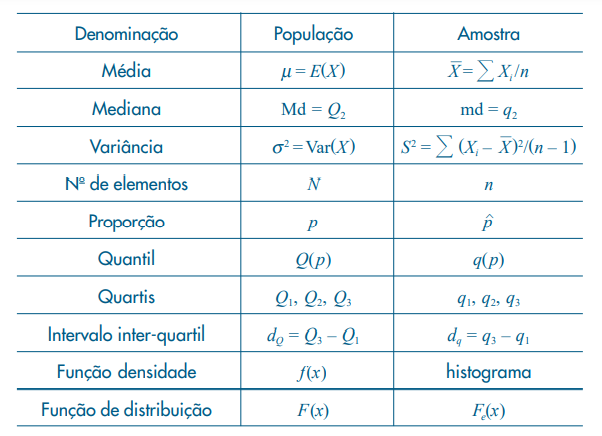

Estimação de parâmetros: A estimação é o processo que consiste no uso de
dados da amostra (dados amostrais) para estimar valores de parâmetros
populacionais desconhecidos, tais como média, desvio padrão, proporções,
etc.

Estimador: é uma função dos elementos da amostra, que será usada no
processo de estimação do parâmetro desejado. O estimador é, como vemos,
uma estatística. Será, portanto, uma variável aleatória caracterizada por uma
distribuição de probabilidade e seus respectivos parâmetros próprios.

O estimador é uma variável aleatória com uma distribuição de probabilidade

## 3. Tamanho Amostral

Ao extrair uma amostra para inferir algo sobre a população, sempre há um erro associado ao **planejamento amostral**.

A medida que o **tamanho da amostra aumenta**, o **erro do estimador diminui**

Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva.

Deste modo, o ponto chave de um levantamento amostral é determinar **o tamanho adequado da amostra** para que **os estimadores pontuais** sejam **estimados com confiança**!

Ou seja, queremos responder à pergunta:

> O quão confiantes estamos com relação aos estimadores pontuais que calcularmos com base em uma amostra?

Ou seja,

- A partir de $\bar{x}$, o que eu posso **inferir** sobre $\mu$?

- Ou, a partir de $\hat{p}$, o que eu posso **inferir** sobre $p$?

Para responder a estas perguntas, vamos introduzir uma das ideias mais poderosas da estatística: o **teorema do limite central** e voltaremos para calcular o tamanho da amostra

## 4 - Teorema do Limite Central (TLC, ou TCL)

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**.

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal.

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande ($n>30$), a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral $n>30$.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

Uma outras palavras, também podemos definir:

Seja uma amostra aleatória ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. A medida que $n$ cresce, a distribuição de probabilidade da média amostral, $\overline{X}$, se aproxima de uma Normal com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt{n}}$. Isto é $\overline{X} \sim N (\mu, \sigma^2/n)$. Se a transformação a baixo for realizada, então $Z \sim N (0,1)$.

$$Z = \frac{\overline{X} -\mu}{\sigma/\sqrt{n}} $$


$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

Conforme o tamanho da amostra cresce, o erro padrão diminu. O relacionamento entre o erro-padrão e o tamanho da amostra às vezes é chamado de regra da raiz quadrada de n: a fim de reduzir o erro-padrão em um fator de 2, o tamanho da amostra deve
ser elevado em um fator de 4.

Na prática, essa abordagem de coletar novas amostras para estimar o erro padrão não costuma ser viável (além de ser um desperdício estatístico).
Felizmente, acontece que não é necessário extrair novas amostras. Em vez disso, você pode usar reamostras *bootstrap*. Na
estatística moderna, o bootstrap se tornou o modo padrão de estimar o erropadrão. Pode ser usado para praticamente qualquer estatística e não se baseia no teorema de limite central ou outras suposições distribucionais.

Vamos entender como funciona a TLC!

In [255]:
# Vamos usar os dados da PNAD:

path = '/content/drive/MyDrive/AdaTech/Estatística I/pnad_2015.csv'

pnad = pd.read_csv(path)
pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [256]:
# Shape do dataframe pnad:

pnad.shape

(76840, 7)

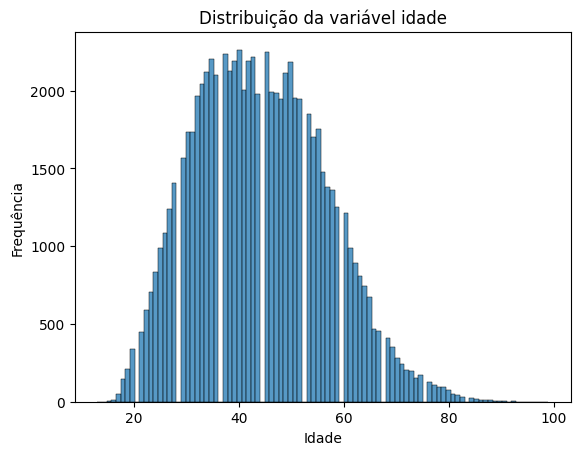

In [257]:
# Histograma da variável idade:

ax = sns.histplot(data=pnad, x='Idade')
ax.set_title('Distribuição da variável idade')
ax.set_ylabel('Frequência')
plt.show()

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [259]:
# Média e desvio padrão populacional:

pnad['Idade'].describe()[['mean', 'std']]

mean    44.071421
std     12.480583
Name: Idade, dtype: float64

A ideia é trabalharmos com 1000 amostras de 3000 elementos (*n*)!

In [260]:
# tamanho da amostra

n = 3000
n_amostras = 1000
amostra = list()

for index in range(n_amostras):
    amostra.append(pnad['Idade'].sample(n).reset_index(drop=True))

amostras = pd.concat(amostra, axis=1)

In [261]:
# Nomeia-se cada coluna pelo número da amostra:

amostras.columns = ['Amostra '+ str(i+1) for i in range(n_amostras)]

In [262]:
amostras

,Amostra 1,Amostra 2,Amostra 3,Amostra 4,Amostra 5,Amostra 6,Amostra 7,Amostra 8,Amostra 9,Amostra 10,...,Amostra 991,Amostra 992,Amostra 993,Amostra 994,Amostra 995,Amostra 996,Amostra 997,Amostra 998,Amostra 999,Amostra 1000
0,50,30,45,69,36,47,42,45,34,36,...,26,43,63,24,32,51,53,66,37,47
1,29,27,55,79,30,35,37,55,30,78,...,45,60,22,36,58,27,65,39,57,43
2,43,55,56,57,38,48,54,45,27,21,...,60,54,35,34,29,36,52,78,54,45
3,30,64,52,57,46,24,55,43,40,29,...,38,43,60,43,47,42,35,38,28,35
4,41,26,46,38,37,25,50,39,27,44,...,32,45,41,39,46,27,45,51,35,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,45,46,34,46,56,35,65,45,37,39,...,42,46,55,35,47,58,61,59,48,51
2996,45,51,29,56,37,70,40,51,40,24,...,77,35,24,34,35,50,52,25,50,36
2997,27,27,45,28,27,44,42,36,36,46,...,35,30,35,43,39,43,46,60,37,39
2998,36,38,28,35,32,41,62,46,46,46,...,27,45,35,35,31,57,44,31,28,51


In [263]:
# As médias das amostras são calculadas:

amostras.mean()

Amostra 1       43.838333
Amostra 2       44.217000
Amostra 3       44.204000
Amostra 4       44.387000
Amostra 5       44.132667
                  ...    
Amostra 996     44.123667
Amostra 997     44.269000
Amostra 998     44.450667
Amostra 999     44.285667
Amostra 1000    44.066000
Length: 1000, dtype: float64

In [264]:
# Menor e maior médias amostrais:

f"Menor média amostral = {amostras.mean().min()}, Maior média amostral = {amostras.mean().max()}"

'Menor média amostral = 43.33, Maior média amostral = 44.785'

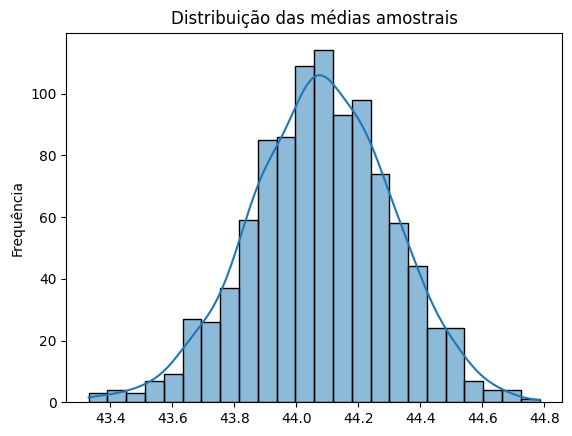

In [265]:
# Histograma das médias amostrais:

ax = sns.histplot(amostras.mean(), kde=True)
ax.set_title('Distribuição das médias amostrais')
ax.set_ylabel('Frequência')
plt.show()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [266]:
# Média e desvio padrão das médias amostrais:

print(f"Média da distribuição = {amostras.mean().mean()}")
print(f"Erro padrão = {amostras.mean().std()}")

Média da distribuição = 44.079905999999994
Erro padrão = 0.22814505424010112


In [267]:
print(f"Média populacional = {pnad['Idade'].mean()}")
print(f"Média das médias amostrais = {amostras.mean().mean()}")

Média populacional = 44.07142113482561
Média das médias amostrais = 44.079905999999994


> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [268]:
# Sobre os devios padrão:


print(f"Desvio padrão populacional = {pnad['Idade'].std()}")
print(f"Erro padrão = {amostras.mean().std()}")

Desvio padrão populacional = 12.48058346535974
Erro padrão = 0.22814505424010112


$$\sigma = \sigma_\bar{x} * \sqrt{n}$$

In [269]:
amostras.mean().std() * np.sqrt(n)

12.496019259054304

**Gráfico QQ**

Um gráfico para visualizar quão próxima uma distribuição amostral está de uma distribuição
normal.

O gráfico QQ ordena os escores z de
baixos a altos e registra cada valor do escore z no eixo y, e o eixo x é o
quantil correspondente a uma distribuição normal para a posição daquele
valor. Como os dados estão normalizados, as unidades correspondem a um
número de desvios-padrão dos dados da média

In [270]:
# Import statsmodels.api:

import statsmodels.api as sm

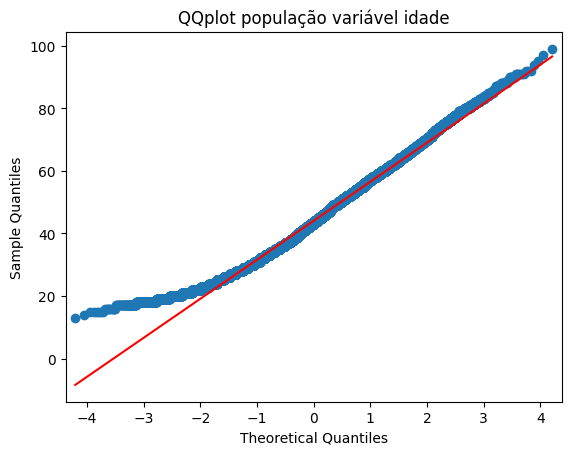

In [271]:
ax = sm.qqplot(pnad['Idade'], line='s')
plt.title('QQplot população variável idade')
plt.show()

In [272]:
# Para testar com distribuição normal:

from scipy import stats

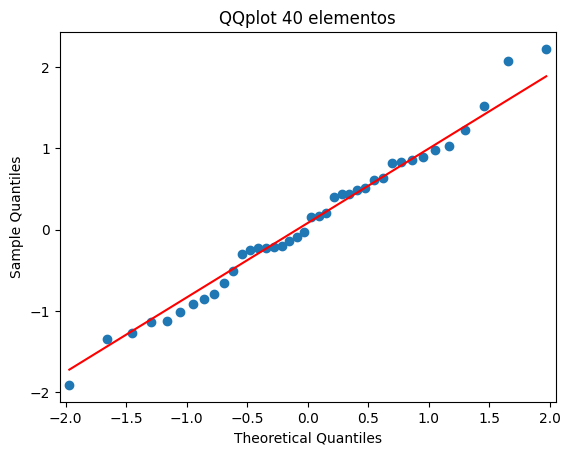

In [274]:
ax = sm.qqplot(stats.norm.rvs(size=40), line='s')
plt.title('QQplot 40 elementos')
plt.show()

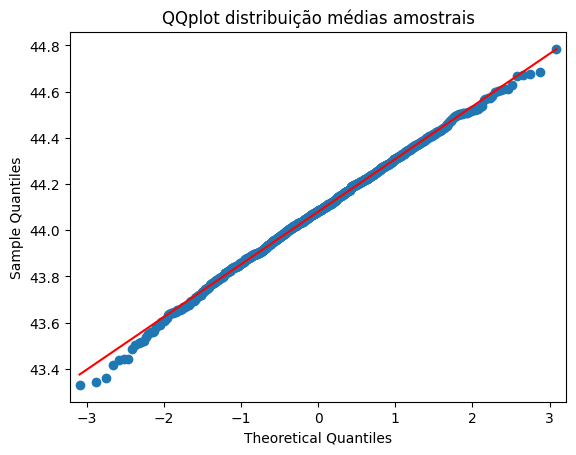

In [281]:
ax = sm.qqplot(amostras.mean(), line='s')
plt.title('QQplot distribuição médias amostrais')
plt.show()

Tabelas de frequência, histogramas, boxplots e erros-padrão são todos meios
de entender o potencial erro de uma estimativa de amostra. **Intervalos de
confiança** são outro.

**Nível de confiança**:

A porcentagem de intervalos de confiança, construída da mesma forma e de uma mesma
população, em que se espera que haja a estatística de interesse.

**Extremidades de intervalo**:  

O topo e a base do intervalo de confiança

## 5 Níveis de confiança e significância


###  5.1 Definições
O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

Para um cientista de dados, um intervalo de confiança é uma ferramenta para ter uma
ideia de quão variável o resultado da amostra pode ser. Os cientistas de dados não
utilizariam essa informação para publicar um artigo acadêmico ou submeter um resultado
a uma agência regulatória (como um pesquisador poderia fazer), mas provavelmente para
comunicar o potencial erro em uma estimativa e, talvez, entender se uma amostra maior é
necessária.





### 5.2  Erro inferencial
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$


#### Tamanho da amostra:
$$n = (\frac{z \sigma}{e})^2$$

##  Intervalos de confiança
***

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

### Exemplo

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatória de 30 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

In [283]:
# Dados do enunciado

std = 150
n = 30
X = 5050
alpha = 0.05
conf = 1 - alpha

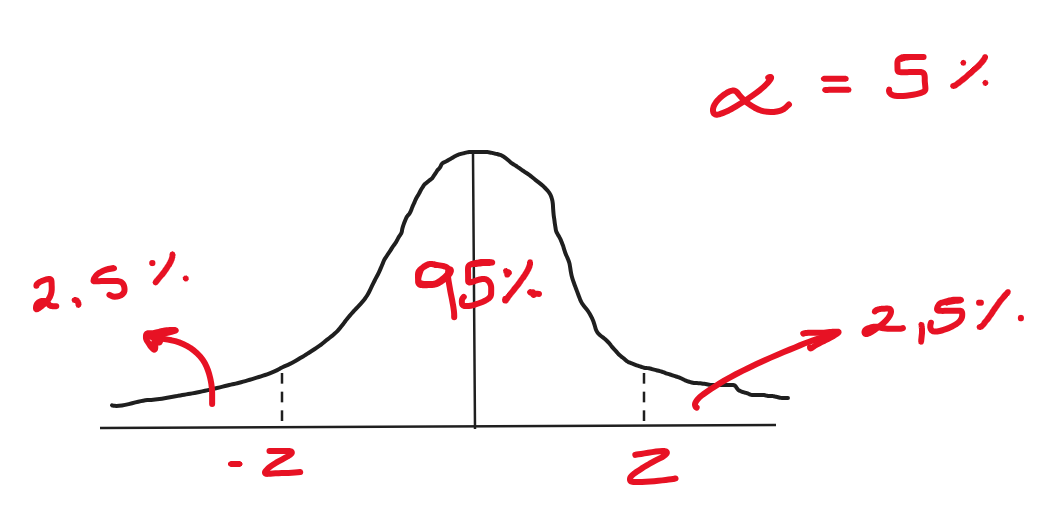

In [286]:
from scipy.stats import norm

In [291]:
# Definindo o valor de Z:

propabilidade = conf + (alpha/2)
Z = norm.ppf(0.975)
Z

1.959963984540054

In [292]:
#Solução

print('Intervalo de confiança: \n')
print(f"[{X - ((Z * std) / np.sqrt(n))}, {X + ((Z * std) / np.sqrt(n))}]")

Intervalo de confiança: 

[4996.324175688485, 5103.675824311515]


In [293]:
# Com a scipy:

norm.interval(conf, loc=X, scale=(std / np.sqrt(n)))

(4996.324175688485, 5103.675824311515)

Na tabela abaixo, segue uma relação de valores que normalmente são utilizados para nível de confiança, com a probabilidade e o Z-score:

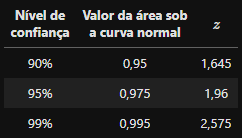


In [210]:
# Outra forma de construir a tabela normal padrão

from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z) - 0.5)

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

In [211]:
tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.0000,0.0040,0.0080,0.0120,0.0160,0.0199,0.0239,0.0279,0.0319,0.0359
0.10,0.0398,0.0438,0.0478,0.0517,0.0557,0.0596,0.0636,0.0675,0.0714,0.0753
0.20,0.0793,0.0832,0.0871,0.0910,0.0948,0.0987,0.1026,0.1064,0.1103,0.1141
0.30,0.1179,0.1217,0.1255,0.1293,0.1331,0.1368,0.1406,0.1443,0.1480,0.1517
0.40,0.1554,0.1591,0.1628,0.1664,0.1700,0.1736,0.1772,0.1808,0.1844,0.1879
0.50,0.1915,0.1950,0.1985,0.2019,0.2054,0.2088,0.2123,0.2157,0.2190,0.2224
0.60,0.2257,0.2291,0.2324,0.2357,0.2389,0.2422,0.2454,0.2486,0.2517,0.2549
0.70,0.2580,0.2611,0.2642,0.2673,0.2704,0.2734,0.2764,0.2794,0.2823,0.2852
0.80,0.2881,0.2910,0.2939,0.2967,0.2995,0.3023,0.3051,0.3078,0.3106,0.3133
0.90,0.3159,0.3186,0.3212,0.3238,0.3264,0.3289,0.3315,0.3340,0.3365,0.3389


In [212]:
tabela_normal_padronizada.iloc[15:22]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.50,0.4332,0.4345,0.4357,0.4370,0.4382,0.4394,0.4406,0.4418,0.4429,0.4441
1.60,0.4452,0.4463,0.4474,0.4484,0.4495,0.4505,0.4515,0.4525,0.4535,0.4545
1.70,0.4554,0.4564,0.4573,0.4582,0.4591,0.4599,0.4608,0.4616,0.4625,0.4633
1.80,0.4641,0.4649,0.4656,0.4664,0.4671,0.4678,0.4686,0.4693,0.4699,0.4706
1.90,0.4713,0.4719,0.4726,0.4732,0.4738,0.4744,0.4750,0.4756,0.4761,0.4767
2.00,0.4772,0.4778,0.4783,0.4788,0.4793,0.4798,0.4803,0.4808,0.4812,0.4817
2.10,0.4821,0.4826,0.4830,0.4834,0.4838,0.4842,0.4846,0.4850,0.4854,0.4857


![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)